<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>


# Curso Propedéutico en *Programación*
<p> Instructor: Dr. Julio Waissman Vilanova </p>
<p>

# Proyecto de programación: El indice de marginalización de México
<p> Alumno: María Fernanda Quintana Lagarda </p>
<p>
<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="200">
</p>
</center>


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

#a. Descargar y Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020".

In [34]:
# Cargar los datos en un DataFrame
csv_imm_url = "https://raw.githubusercontent.com/mfql/IMM_20/main/IMM_2020.csv"
local_imm_filename = "datos/IMM_2020.csv"
df_imm = pd.read_csv(csv_imm_url)
df_imm.head(20)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
5,1,Aguascalientes,1006,Pabellón de Arteaga,47646,2.732339,25.724280,0.541338,0.425487,1.044760,0.705635,19.075954,32.764555,64.335011,58.624768,Muy bajo,0.917982
6,1,Aguascalientes,1007,Rincón de Romos,57369,3.445917,27.094343,0.965870,0.501341,1.027223,1.302663,20.975502,44.285241,76.643972,57.646671,Muy bajo,0.902667
7,1,Aguascalientes,1008,San José de Gracia,9552,2.439773,28.419940,2.107139,0.922529,1.708775,0.859629,21.572750,41.300251,75.410936,57.527531,Muy bajo,0.900801
8,1,Aguascalientes,1009,Tepezalá,22485,4.235219,35.086278,1.385042,0.585292,1.085694,1.429720,22.985739,76.762286,76.943557,56.604314,Muy bajo,0.886345
9,1,Aguascalientes,1010,El Llano,20853,3.898421,34.757713,2.321131,1.030523,1.781333,1.452547,21.816786,69.754951,76.336092,56.555794,Muy bajo,0.885585


In [26]:
# Mostrar la información de los datos
df_imm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB


#b. Mostrar la descripción del DataFrame (medias, máximos mínimos, etc...) mostrart algunos hallazgos interesantes de la simple inspección visual y por estadísticas básicas de los datos.

In [27]:
# Mostrar la descripción estadística de los datos
descrip=df_imm.describe()
print(descrip)

           CVE_ENT       CVE_MUN       POB_TOT        ANALF        SBASC  \
count  2469.000000   2469.000000  2.469000e+03  2469.000000  2469.000000   
mean     19.215472  19324.164844  5.103849e+04    10.164466    45.853026   
std       7.367340   7382.892458  1.469907e+05     7.633633    13.981594   
min       1.000000   1001.000000  8.100000e+01     0.353446     5.535137   
25%      14.000000  14079.000000  4.489000e+03     4.427755    35.737568   
50%      20.000000  20226.000000  1.355200e+04     8.202762    46.339439   
75%      24.000000  24027.000000  3.528400e+04    13.787294    55.856378   
max      32.000000  32058.000000  1.922523e+06    53.071253    88.328076   

             OVSDE        OVSEE        OVSAE         OVPT         VHAC  \
count  2469.000000  2469.000000  2469.000000  2469.000000  2469.000000   
mean      3.159963     1.500793     6.118145     7.987232    26.566286   
std       5.289299     2.769167     9.245995     8.973591    10.586540   
min       0.000000 

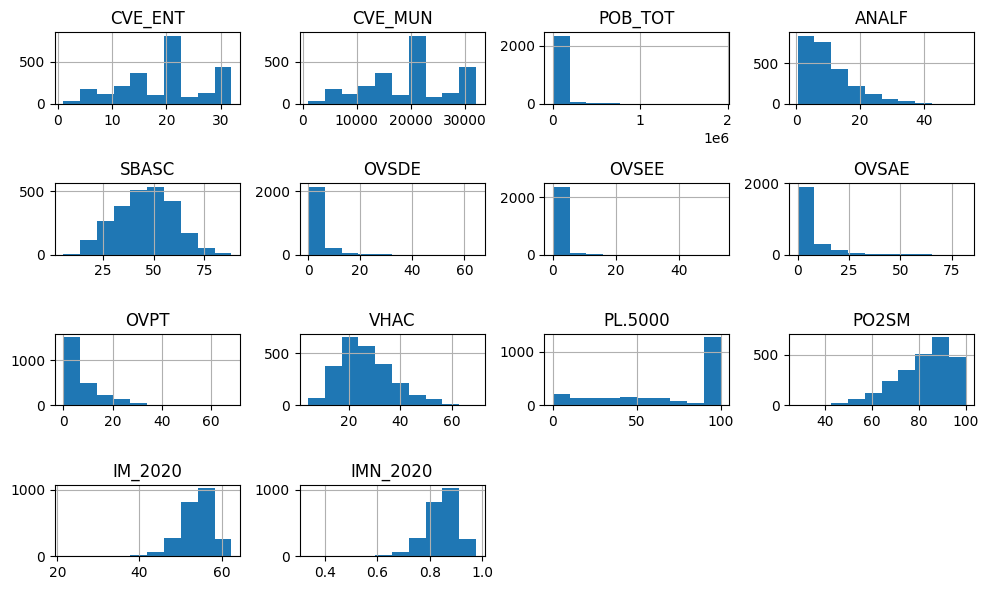

In [28]:
# Verificar la distribución de las variables numéricas
df_imm.hist(figsize=(10,6))
pl.tight_layout()
pl.show()

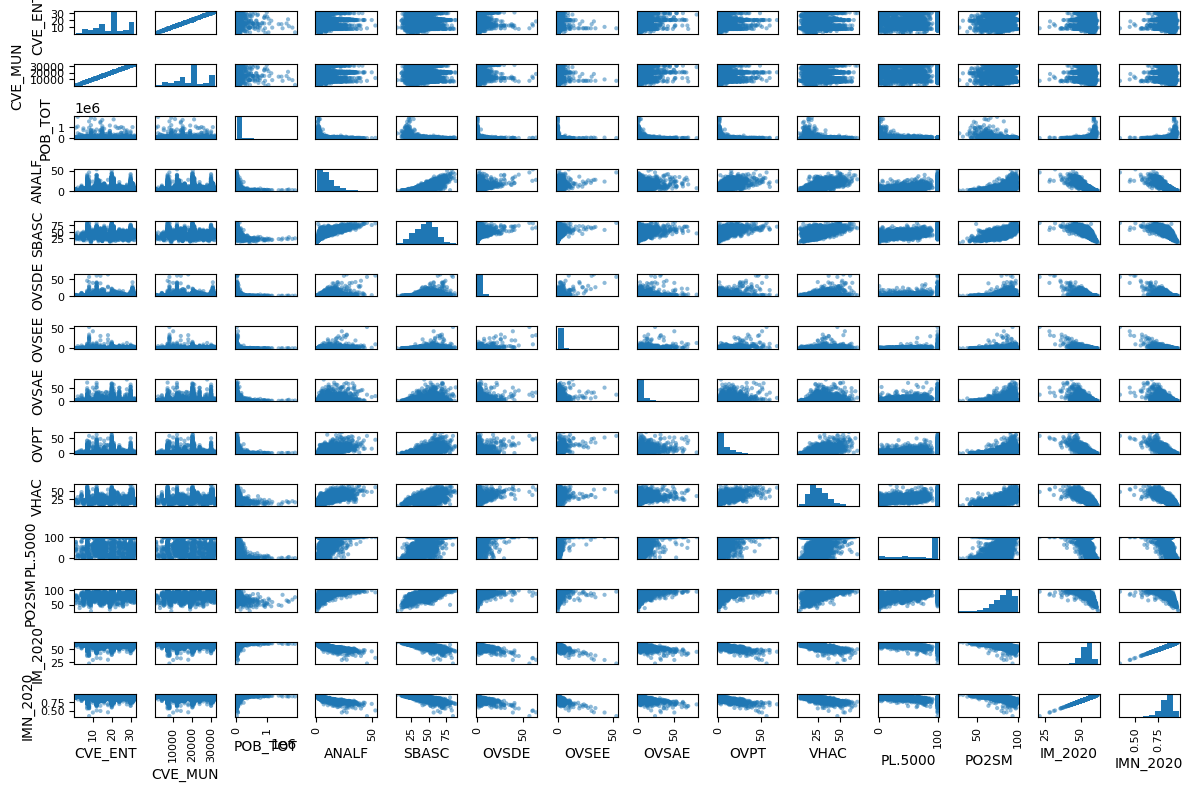

In [29]:
# Explorar la relación entre variables numéricas
pd.plotting.scatter_matrix(df_imm, figsize=(12, 8))
pl.tight_layout()
pl.show()

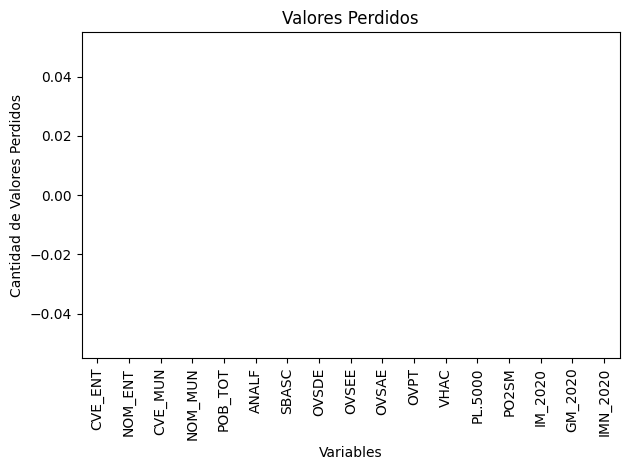

In [35]:
# Realizar un análisis de valores perdidos
missing_values = df_imm.isnull().sum()
missing_values.plot(kind='bar')
pl.title('Valores Perdidos')
pl.xlabel('Variables')
pl.ylabel('Cantidad de Valores Perdidos')
pl.tight_layout()
pl.show()

#c. Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png

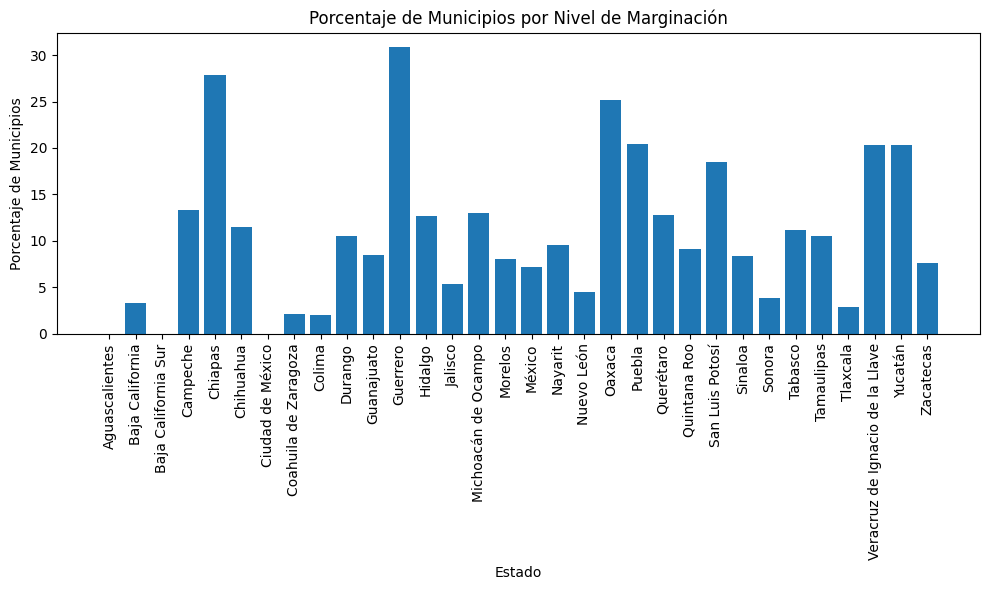

In [42]:
#
df_imm = pd.read_csv(csv_imm_url)
df_imm['porcentaje'] = df_imm['GM_2020'].map({'Muy bajo': 0, 'Bajo': 10, 'Medio': 20, 'Alto': 30, 'Muy alto': 40})
#
df_imm =df_imm.groupby('NOM_ENT').agg({'porcentaje': 'mean'})
# Crear la gráfica de barras
pl.figure(figsize=(10, 6))
pl.bar(df_imm.index, df_imm['porcentaje'])
# consistently
pl.xlabel('Estado')
pl.ylabel('Porcentaje de Municipios')
pl.title('Porcentaje de Municipios por Nivel de Marginación')
pl.xticks(rotation=90)
pl.tight_layout()

pl.savefig('graficaC.png')
pl.show()

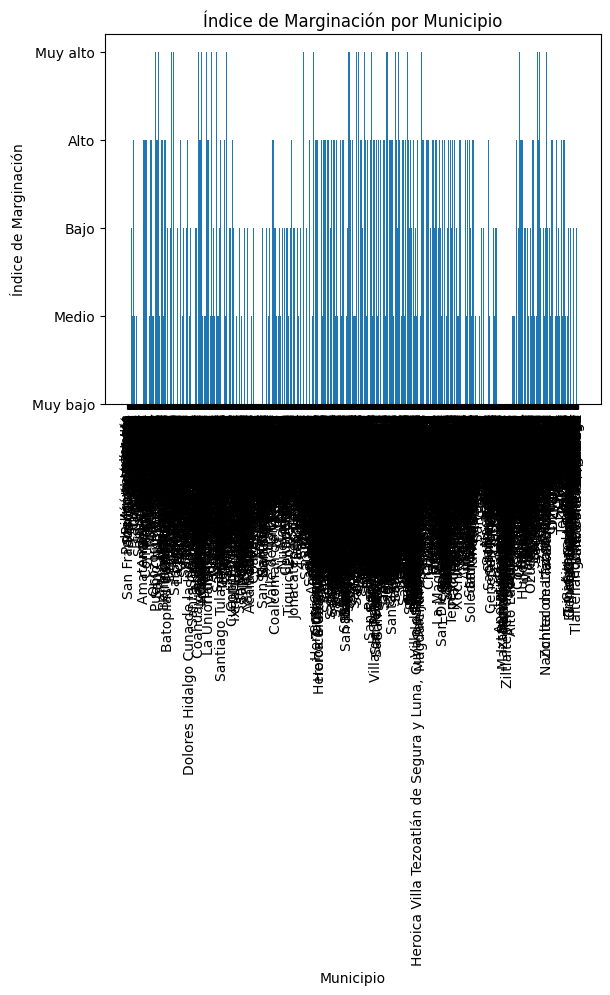

<Figure size 640x480 with 0 Axes>

In [43]:
# Datos
df_imm = pd.read_csv(csv_imm_url)
municipios = df_imm.NOM_MUN.astype(str)
marginacion = df_imm.GM_2020.astype(str)

# Creación del gráfico de barras
pl.bar(municipios, marginacion)

# Añadir etiquetas y título
pl.xlabel('Municipio')
pl.ylabel('Índice de Marginación')
pl.title('Índice de Marginación por Municipio')

# Rotar etiquetas del eje x si es necesario
pl.xticks(rotation=90)

# Mostrar el gráfico
pl.show()
# Guardar la gráfica en un archivo png
pl.savefig('porcentaje_marginacion2.png')

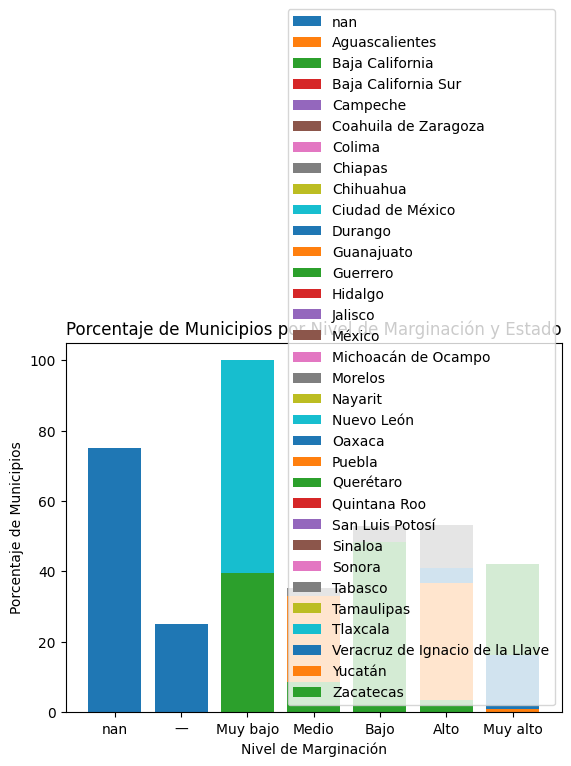

In [ ]:
municipios = df_imm.NOM_MUN.astype(str)
estados = df_imm.NOM_ENT.astype(str)
marginacion = df_imm.GM_2020.astype(str)
# Cálculo de los recuentos por estado y nivel de marginación
total_municipios_por_estado = {}
municipios_por_marginacion = {}

for i in range(len(estados)):
    estado = estados[i]
    municipio = municipios[i]
    nivel_marginacion = marginacion[i]
    
    # Recuento total de municipios por estado
    if estado in total_municipios_por_estado:
        total_municipios_por_estado[estado] += 1
    else:
        total_municipios_por_estado[estado] = 1
    
    # Recuento de municipios por nivel de marginación
    if estado not in municipios_por_marginacion:
        municipios_por_marginacion[estado] = {}
    
    if nivel_marginacion in municipios_por_marginacion[estado]:
        municipios_por_marginacion[estado][nivel_marginacion] += 1
    else:
        municipios_por_marginacion[estado][nivel_marginacion] = 1

# Cálculo del porcentaje de municipios por nivel de marginación en cada estado
porcentaje_por_marginacion = {}

for estado in municipios_por_marginacion:
    porcentaje_por_marginacion[estado] = {}
    
    for nivel_marginacion in municipios_por_marginacion[estado]:
        porcentaje = (municipios_por_marginacion[estado][nivel_marginacion] / total_municipios_por_estado[estado]) * 100
        porcentaje_por_marginacion[estado][nivel_marginacion] = porcentaje

# Creación del gráfico de barras
for estado in porcentaje_por_marginacion:
    niveles = porcentaje_por_marginacion[estado].keys()
    porcentajes = porcentaje_por_marginacion[estado].values()
    
    pl.bar(niveles, porcentajes, label=estado)

# Añadir etiquetas y leyenda
pl.xlabel('Nivel de Marginación')
pl.ylabel('Porcentaje de Municipios')
pl.title('Porcentaje de Municipios por Nivel de Marginación y Estado')
# Mover la leyenda al centro derecho
pl.legend(loc='lower right')

# Mostrar el gráfico
pl.show()


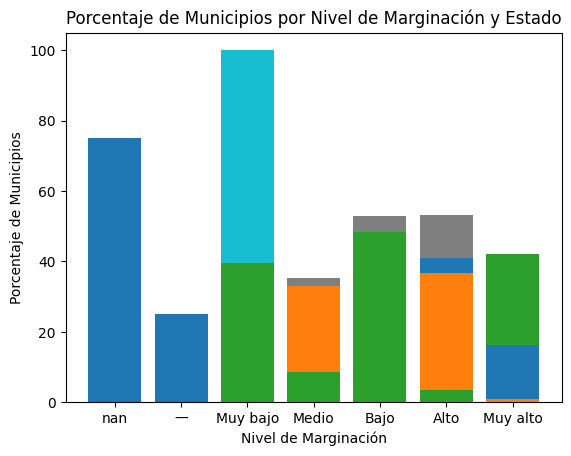

<Figure size 640x480 with 0 Axes>

In [ ]:
municipios = df_imm.NOM_MUN.astype(str)
estados = df_imm.NOM_ENT.astype(str)
marginacion = df_imm.GM_2020.astype(str)
# Cálculo de los recuentos por estado y nivel de marginación
total_municipios_por_estado = {}
municipios_por_marginacion = {}

for i in range(len(estados)):
    estado = estados[i]
    municipio = municipios[i]
    nivel_marginacion = marginacion[i]
    
    # Recuento total de municipios por estado
    if estado in total_municipios_por_estado:
        total_municipios_por_estado[estado] += 1
    else:
        total_municipios_por_estado[estado] = 1
    
    # Recuento de municipios por nivel de marginación
    if estado not in municipios_por_marginacion:
        municipios_por_marginacion[estado] = {}
    
    if nivel_marginacion in municipios_por_marginacion[estado]:
        municipios_por_marginacion[estado][nivel_marginacion] += 1
    else:
        municipios_por_marginacion[estado][nivel_marginacion] = 1

# Cálculo del porcentaje de municipios por nivel de marginación en cada estado
porcentaje_por_marginacion = {}

for estado in municipios_por_marginacion:
    porcentaje_por_marginacion[estado] = {}
    
    for nivel_marginacion in municipios_por_marginacion[estado]:
        porcentaje = (municipios_por_marginacion[estado][nivel_marginacion] / total_municipios_por_estado[estado]) * 100
        porcentaje_por_marginacion[estado][nivel_marginacion] = porcentaje

# Creación del gráfico de barras
for estado in porcentaje_por_marginacion:
    niveles = porcentaje_por_marginacion[estado].keys()
    porcentajes = porcentaje_por_marginacion[estado].values()
    
    pl.bar(niveles, porcentajes, label=estado)

# Añadir etiquetas y leyenda
pl.xlabel('Nivel de Marginación')
pl.ylabel('Porcentaje de Municipios')
pl.title('Porcentaje de Municipios por Nivel de Marginación y Estado')

# Mostrar el gráfico
pl.show()
# Guardar la gráfica en un archivo png
pl.savefig('porcentaje_marginacion.png')


#d. Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg

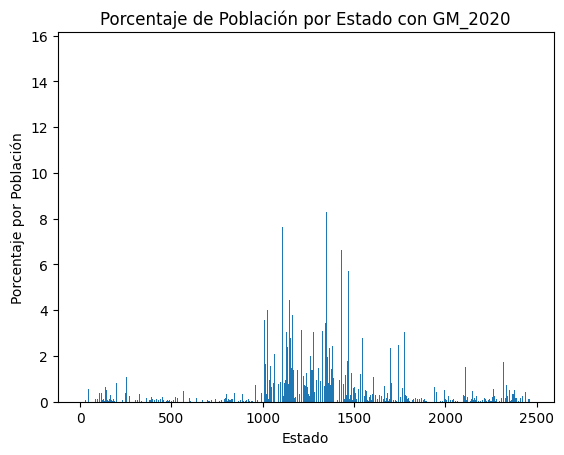

In [67]:
df_imm = pd.read_csv(csv_imm_url)

# Create a new column for the percentage of the population by marginalization index.
df_imm['Porcentaje'] = df_imm['GM_2020'].map({'Muy bajo': 0, 'Bajo': 10, 'Medio': 20, 'Alto': 30, 'Muy alto': 40})

# Group the data by state and calculate the percentage of the population by marginalization index.

# Add a column with the population by state.
df_imm['Population'] = df_imm['POB_TOT']

# Plot the data.
pl.bar(df_imm.index, df_imm['Porcentaje'] / df_imm['Population'] * 100)
pl.xlabel('Estado')
pl.ylabel('Porcentaje por Población')
pl.title('Porcentaje de Población por Estado con GM_2020')
pl.savefig('graph_pop.jpg')

In [59]:
df_imm = pd.read_csv(csv_imm_url)
df_imm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB


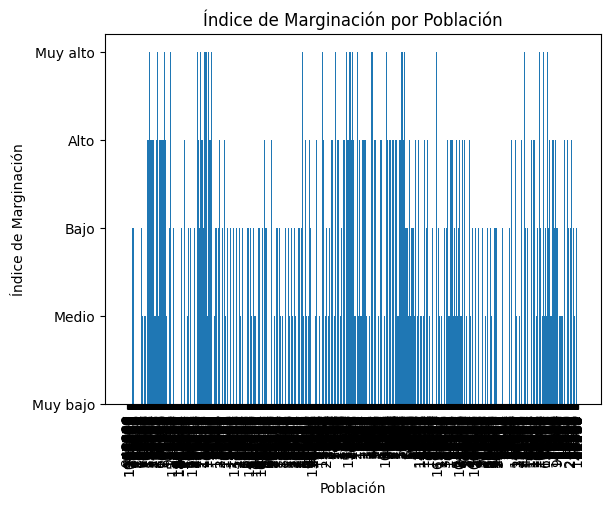

<Figure size 640x480 with 0 Axes>

In [86]:
# Datos
pob = df_imm.POB_TOT.astype(str)
marginacion = df_imm.GM_2020.astype(str)

# Creación del gráfico de barras
pl.bar(pob, marginacion)

# Añadir etiquetas y título
pl.xlabel('Población')
pl.ylabel('Índice de Marginación')
pl.title('Índice de Marginación por Población')

# Rotar etiquetas del eje x si es necesario
pl.xticks(rotation=90)

# Mostrar el gráfico
pl.show()
# Guardar la gráfica en un archivo png
pl.savefig('porcentaje_marginacion_poblacion.png')

#e.¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.

Las gráficas a simple vista son muy similares. Abarcan los mismo parametros, pero si se encuentran diferencias entre ellas. 
La primera es que se disminuye en los estados que la derecha, pero en los de la izquierda los primeros muestran una mayor semejanza en el Grado de Marginación. 

#f.Grafica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.


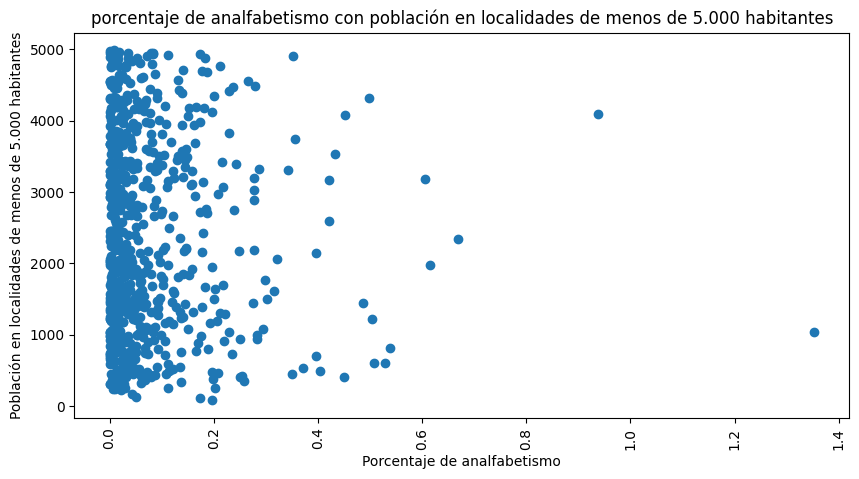

<Figure size 640x480 with 0 Axes>

In [111]:
df_imm = pd.read_csv(csv_imm_url)
#Población con menos de 5 000 habitantes
poblacion_menor_5 = df_imm.loc[df_imm.POB_TOT < 5000, 'POB_TOT']
#Crear el porcentaje de la población con menos de 5 000 habitantes
porcentaje = (poblacion_menor_5/ df_imm['POB_TOT'])*100


#Población con analfabetismo

porcen_analfa = (df_imm['ANALF'] / df_imm['POB_TOT'])*100
#Asegurando el tamaño de las variables
if len(porcen_analfa) != len(poblacion_menor_5):
    porcen_analfa = porcen_analfa[:len(poblacion_menor_5)]

# Creación del gráfico de barras
fig = pl.figure(figsize=(10, 5))
pl.scatter(porcen_analfa,poblacion_menor_5)

# Añadir etiquetas y título
pl.xlabel('Porcentaje de analfabetismo')
pl.ylabel('Población en localidades de menos de 5.000 habitantes')
pl.title('porcentaje de analfabetismo con población en localidades de menos de 5.000 habitantes')

# Rotar etiquetas del eje x si es necesario
pl.xticks(rotation=90)

# Mostrar el gráfico
pl.show()
# Guardar la gráfica en un archivo png
pl.savefig('porcentaje_analfa.png')

#g.¿Existe una relación? Sí existe relación.

Hay algunas explicaciones posibles para esta correlación. Una posibilidad es que se deba a la pobreza. Las localidades con un mayor porcentaje de población con menos de 5.000 habitantes también tienen más probabilidades de ser pobres. La pobreza puede conducir a una serie de problemas, incluido el analfabetismo.

Otra posibilidad es que se deba a la falta de acceso a la educación. Las localidades con mayor porcentaje de población con menos de 5.000 habitantes también son más propensas a carecer de acceso a la educación. Esto también puede conducir al analfabetismo.

Es importante tener en cuenta que esto es solo una correlación y no significa necesariamente que uno cause el otro. Puede haber otros factores que estén provocando tanto el porcentaje de analfabetismo como el porcentaje de población en localidades de menos de 5.000 habitantes.

#¿Cómo podrías analizar con que variable tiene mñas corelación el porcentaje de analfabetismo en personas mayores de 15 años?

Se tendría más relación con la variable de Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos

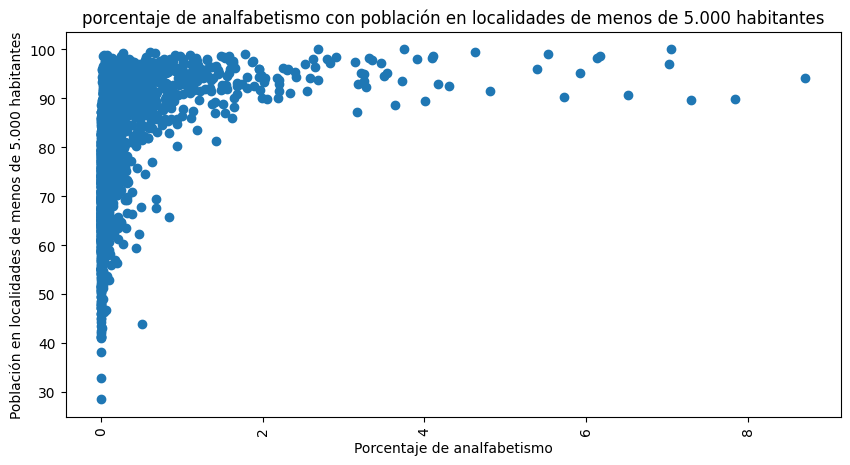

<Figure size 640x480 with 0 Axes>

In [114]:
df_imm = pd.read_csv(csv_imm_url)
#Población con 2 salarios minimos
poblacion_2salario = df_imm.PO2SM
#Crear el porcentaje de la población con menos de 5 000 habitantes
porcentaje2s = (poblacion_2salario/ df_imm['POB_TOT'])*100

#Población con analfabetismo
porcen_analfa = (df_imm['ANALF'] / df_imm['POB_TOT'])*100
#Asegurando el tamaño de las variables
if len(porcen_analfa) != len(poblacion_2salario):
    porcen_analfa = porcen_analfa[:len(poblacion_2salario)]

# Creación del gráfico de barras
fig = pl.figure(figsize=(10, 5))
pl.scatter(porcen_analfa,poblacion_2salario)

# Añadir etiquetas y título
pl.xlabel('Porcentaje de analfabetismo')
pl.ylabel('Población en localidades de menos de 5.000 habitantes')
pl.title('porcentaje de analfabetismo con población en localidades de menos de 5.000 habitantes')

# Rotar etiquetas del eje x si es necesario
pl.xticks(rotation=90)

# Mostrar el gráfico
pl.show()
# Guardar la gráfica en un archivo png
pl.savefig('porcentaje_analfa.png')

#h.Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal y que pudieran ser de importancia a la hora de definir políticas públicas. Se va a calificar la originalidad de los indicadores. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.

In [115]:
df_new=pd.DataFrame({'Nombe_Estado': df_imm['NOM_ENT'],
                     'Nombre_Municipio': df_imm['NOM_MUN'],
                     'Analfabetismo': df_imm['ANALF'],
                     'Sin_edu_basica': df_imm['SBASC'],
                     'Poblacion_menor_5mil': df_imm['PL.5000'],
                     'Poblacion_2salarios_min':df_imm['PO2SM'],
                     'Grado_marg': df_imm['GM_2020'],
                     'Indice_normal_marg': df_imm['IMN_2020']
                     })
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nombe_Estado             2469 non-null   object 
 1   Nombre_Municipio         2469 non-null   object 
 2   Analfabetismo            2469 non-null   float64
 3   Sin_edu_basica           2469 non-null   float64
 4   Poblacion_menor_5mil     2469 non-null   float64
 5   Poblacion_2salarios_min  2469 non-null   float64
 6   Grado_marg               2469 non-null   object 
 7   Indice_normal_marg       2469 non-null   float64
dtypes: float64(5), object(3)
memory usage: 154.4+ KB



Estos indicadores son fundamentales para la implementación de nuevas políticas públicas, ya que identifican los factores que influyen en la marginación. La marginación surge como consecuencia del analfabetismo, las condiciones de vida precarias y los bajos salarios. Por lo tanto, estos indicadores proporcionan información clave para abordar y mejorar estas problemáticas a través de acciones y políticas gubernamentales.